In [1]:
#Sammy Pardes
#IST652
#Final Project
#8/20/2020

#sources:
#https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
#https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
#https://www.kite.com/python/answers/how-to-reorder-columns-in-a-pandas-dataframe-in-python#:~:text=Use%20double%20brackets%20to%20reorder,order%20to%20reorder%20the%20columns.
#https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
#https://stackoverflow.com/questions/48366506/calculate-new-column-as-the-mean-of-other-columns-pandas/48366525
#https://stackoverflow.com/questions/17787366/setting-yaxis-in-matplotlib-using-pandas
#https://stackoverflow.com/questions/61214512/how-to-create-a-grouped-barplot-from-three-columns-in-pandas
#https://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot
#https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot
#https://stackoverflow.com/questions/33227473/how-to-set-the-range-of-y-axis-for-a-seaborn-boxplot
#https://stackoverflow.com/questions/42404154/increase-tick-label-font-size-in-seaborn
#https://www.marsja.se/how-to-change-size-of-seaborn-plot/
#https://stackoverflow.com/questions/51004029/create-a-new-dataframe-based-on-rows-with-a-certain-value
#https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist
#https://stackoverflow.com/questions/45588724/generating-word-cloud-for-items-in-a-list-in-python
#https://www.datacamp.com/community/tutorials/wordcloud-python
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

#import/install statements
#!pip install vaderSentiment
#!pip install wordcloud
import pandas as pd
import seaborn as sb
from matplotlib import pyplot
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#import data set - wineOnly

wineOnly = pd.read_csv("Wines.csv", encoding = "ISO-8859-1") #load data w/o reviews from .csv file
#wineOnly.head()
#len(wineOnly)

In [4]:
#data cleaning - wineOnly - drop columns

wineOnly = wineOnly.drop(columns=["Designation", "Vintage"]) #remove designation and vintage fields

In [5]:
#data cleaning - wineOnly - replace characters, change data types

wineOnly["Price"] = wineOnly["Price"].str.replace("$","") #remove "$" character from prices
wineOnly["Price"] = wineOnly["Price"].str.replace(",","") #remove "," character from prices

wineOnly["Price"] = wineOnly["Price"].astype(float) #set Price to have a datatype of float
wineOnly["Points"] = wineOnly["Points"].astype(int) #set Points to have a datatype of int

In [6]:
#data cleaning - wineOnly - remove NAs

wineOnly = wineOnly.dropna() #remove any rows with NAs from the data frame

In [7]:
#data cleaning - wineOnly - rename columns

wineOnly.columns = ["country", "county", "points", "price", "province", "title", "variety", "winery"] #rename columns

In [8]:
#data cleaning - wineOnly - save clean df

wineOnlyClean = wineOnly #save cleansed version of the data frame in new variable

print("There are {:d} wines in the cleansed data set that does not contain reviews.".format(len(wineOnlyClean))) #get number of remaining rows

wineOnlyClean.head() #preview of cleansed data frame

There are 19494 wines in the cleansed data set that does not contain reviews.


,country,county,points,price,province,title,variety,winery
0,Spain,Cava,88,13.0,Catalonia,L'Arboc NV 1919 Brut Selecció Sparkling (Cava),Sparkling Blend,L'Arboc
1,Italy,Vernaccia di San Gimignano,87,14.0,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929
2,Italy,Sangiovese di Romagna Superiore,84,15.0,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929
4,France,Rivesaltes,95,350.0,Languedoc-Roussillon,Gérard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Gérard Bertrand
11,US,Sonoma Valley,89,170.0,California,Sebastiani 1987 Cherryblock Cabernet Sauvignon...,Cabernet Sauvignon,Sebastiani


In [9]:
#import data set - wineReviews

wineReviews = pd.read_json("winemag-data-130k-v2.json")

In [10]:
#data cleaning - wineReviews - drop columns

wineReviews = wineReviews.drop(columns=["taster_name", "taster_twitter_handle", "region_2", "designation"]) #drop unwanted columns

In [11]:
#data cleaning - wineReviews - remove NAs

wineReviews = wineReviews.dropna() #drop NAs

In [12]:
#data cleaning - wineReviews - change data type

wineReviews["points"] = wineReviews["points"].astype(int) #set points as datatype of int
wineReviews["price"] = wineReviews["price"].astype(float)#set price as datatype of float

In [13]:
#data cleaning - wineReviews - rename column

wineReviews.rename(columns={"region_1":"county"}, inplace=True) #rename region_1 column to county to match other data

In [14]:
#data cleaning - wineReviews - reorder columns

colnames = ["country", "county", "points", "price", "province", "title", "variety", "winery", "description"] #define column names list

wineReviews = wineReviews.reindex(columns=colnames) #reorder columns to match colnames list (same as wineOnly plus description field)

In [15]:
#data cleaning - wineReviews - save clean df

wineReviewsClean = wineReviews #save cleansed version of the dataframe

print("There are {:d} wines in the cleansed data set that contains reviews.".format(len(wineReviewsClean))) #get number of remaining rows

wineReviewsClean.head() #preview cleansed dataframe

There are 101400 wines in the cleansed data set that contains reviews.


,country,county,points,price,province,title,variety,winery,description
2,US,Willamette Valley,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Tart and snappy, the flavors of lime flesh and..."
3,US,Lake Michigan Shore,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"Pineapple rind, lemon pith and orange blossom ..."
4,US,Willamette Valley,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Much like the regular bottling from 2012, this..."
5,Spain,Navarra,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Blackberry and raspberry aromas show a typical...
6,Italy,Vittoria,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,"Here's a bright, informal red that opens with ..."


In [16]:
#data cleaning - join dfs on title

wineCleanTitles = wineOnlyClean[["title", "points"]] #get titles and points from wine only df

wineCombo = wineCleanTitles.join(wineReviewsClean.set_index("title"), on = "title", lsuffix="_a", rsuffix="_b") #join titles from wine only list with data set that has reviews on "title" field

wineCombo = wineCombo.dropna() #drop NAs

wineCombo["avgPoints"] = wineCombo[["points_a", "points_b"]].mean(axis=1) #get average points score for both data sets

wineCombo = wineCombo.drop(columns=["points_a", "points_b"]) #remove non-averaged point columns

print("There are {:d} wines in both data sets.".format(len(wineCombo)))

wineCombo.head() #preview cleansed df

There are 17298 wines in both data sets.


,title,country,county,price,province,variety,winery,description,avgPoints
0,L'Arboc NV 1919 Brut Selecció Sparkling (Cava),Spain,Cava,13.0,Catalonia,Sparkling Blend,L'Arboc,"Apple, lemon-lime and bready aromas are welcom...",88.0
4,Gérard Bertrand 1945 Legend Vintage Red (Rives...,France,Rivesaltes,350.0,Languedoc-Roussillon,Red Blend,Gérard Bertrand,"For any serious fan of Rivesaltes, this is a m...",95.0
11,Sebastiani 1987 Cherryblock Cabernet Sauvignon...,US,Sonoma Valley,170.0,California,Cabernet Sauvignon,Sebastiani,"Dark, earthy aromas of soy or fruitcake pick u...",89.0
23,Gan Eden 1994 Chardonnay (Sonoma County),US,Sonoma County,13.0,California,Chardonnay,Gan Eden,Apple-cider and earth aromas open to a simple ...,82.0
35,Castillo de Almansa 1995 Reserva Red (Almansa),Spain,Almansa,10.0,Central Spain,Red Blend,Castillo de Almansa,Tart cherry aromas and flavors with tarragon a...,84.0


In [17]:
#data analysis - provinces

wineProvs = pd.DataFrame(wineCombo.groupby(['country','province'])['avgPoints'].mean().reset_index()) #group wines by average score of province

wineProvs.head()

,country,province,avgPoints
0,Argentina,Mendoza Province,86.908062
1,Argentina,Other,86.486486
2,Australia,Australia Other,85.627451
3,Australia,New South Wales,88.416667
4,Australia,South Australia,89.221154


[(80, 95)]

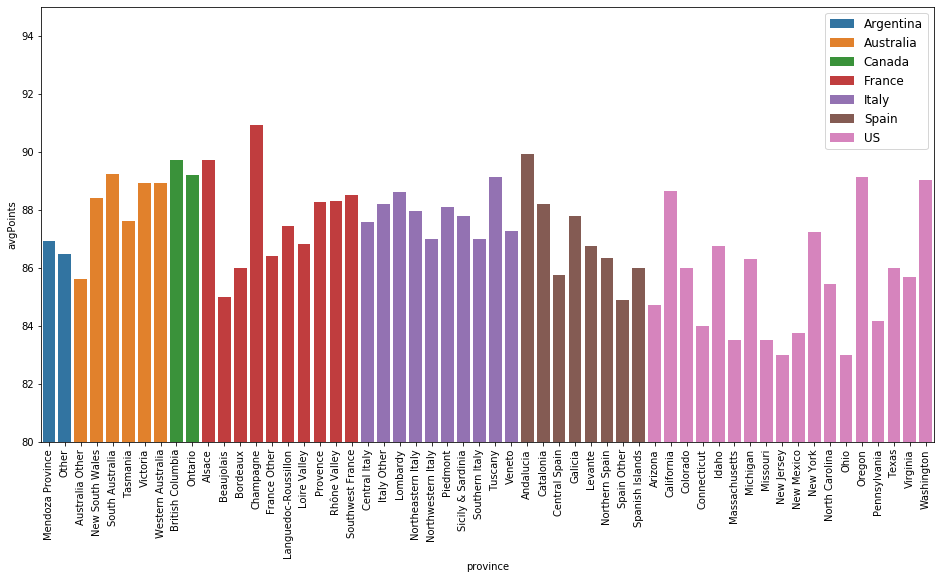

In [18]:
#data analysis - provinces plot

pyplot.figure(figsize=(16, 8)) #set figure size

provPlot = sb.barplot(x="province", y="avgPoints", data=wineProvs, hue="country", dodge=False) #plot province and score, set color to country 

pyplot.legend(loc='upper right', fontsize='12') #move legend to top right, change font size

for item in provPlot.get_xticklabels(): #rotate x-axis label 90 degrees
    item.set_rotation(90)
    
provPlot.set(ylim=(80, 95)) #set y-scale to be 80-95

In [19]:
#data analysis - best provinces

wineProvs.nlargest(5,"avgPoints") #get top highest scoring wines

,country,province,avgPoints
13,France,Champagne,90.928571
30,Spain,Andalucia,89.909091
8,Canada,British Columbia,89.717391
10,France,Alsace,89.715576
4,Australia,South Australia,89.221154


In [20]:
#data analysis - worst provinces

wineProvs.nsmallest(5,"avgPoints") #get bottom lowest scoring wines

,country,province,avgPoints
46,US,New Jersey,83.00
50,US,Ohio,83.00
43,US,Massachusetts,83.50
45,US,Missouri,83.50
47,US,New Mexico,83.75


In [21]:
#data analysis - counties

bestProvs = wineProvs.nlargest(10,"avgPoints") #save top 10 provinces

bestProvs = pd.DataFrame(bestProvs["province"]) #save top 10 provinces as dataframe

bestProvsFull = bestProvs.join(wineCombo.set_index("province"), on = "province") #new DF with only wines from the top 10 provinces

print("There are {:d} wines from the top 10 provinces".format(len(bestProvsFull)))

bestProvsFull["province"].unique()

There are 4345 wines from the top 10 provinces


array(['Champagne', 'Andalucia', 'British Columbia', 'Alsace',
       'South Australia', 'Ontario', 'Oregon', 'Tuscany', 'Washington',
       'Western Australia'], dtype=object)

In [22]:
#data analysis - counties

wineCounty = bestProvsFull.groupby(["province", "county"])["avgPoints"].mean().reset_index() #group wine by average score in each county (top 10 provinces only)

wineCounty.nlargest(5, "avgPoints") #view top 5 best counties

,province,county,avgPoints
2,Andalucia,Jerez,94.000000
7,British Columbia,Similkameen Valley,93.000000
9,Ontario,Beamsville Bench,93.000000
29,Oregon,Walla Walla Valley (OR),92.047619
51,Tuscany,Alta Valle della Greve,92.000000


[(90, 95)]

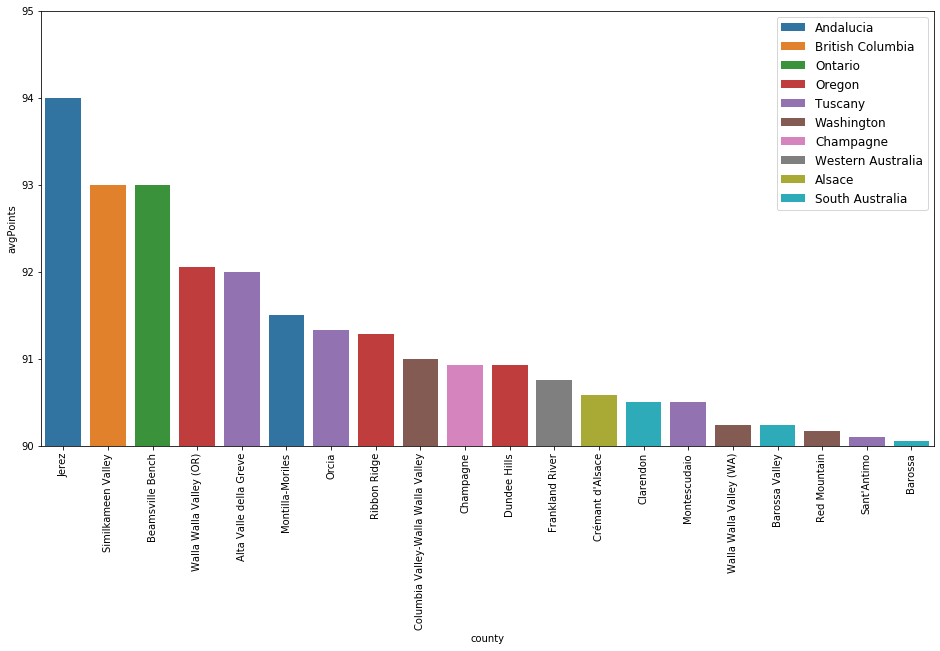

In [23]:
#data analysis - counties plot

wineCounty20 = wineCounty.nlargest(20, "avgPoints") #save top counties as new df

pyplot.figure(figsize=(16, 8)) #set figure size

countyPlot = sb.barplot(x="county", y="avgPoints", data=wineCounty20, hue="province", dodge=False) #plot county and score, set color to province 

pyplot.legend(loc='upper right', fontsize='12') #move legend to top right, change font size

for item in countyPlot.get_xticklabels(): #rotate x-axis label 90 degrees
    item.set_rotation(90)
    
countyPlot.set(ylim=(90, 95)) #set y-scale to be 90-95


In [24]:
#data analysis - best wines

bestWines = wineCombo.nlargest(1000, "avgPoints") #save top 1000 wines

bestWines.head()


,title,country,county,price,province,variety,winery,description,avgPoints
2431,Cardinale 2006 Cabernet Sauvignon (Napa Valley),US,Napa Valley,200.0,California,Cabernet Sauvignon,Cardinale,Tasted in a flight of great and famous Napa wi...,100.0
5836,Venge 2008 Family Reserve Cabernet Sauvignon (...,US,Oakville,125.0,California,Cabernet Sauvignon,Venge,"An absolute joy and triumph. Just superb, show...",99.0
6379,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,US,Walla Walla Valley (OR),75.0,Oregon,Syrah,Cayuse,In a vintage that produced the finest overall ...,99.0
9981,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,US,Sonoma Coast,75.0,California,Pinot Noir,Williams Selyem,This expresses the greatness of its vintage an...,99.0
15707,Alpha Omega 2012 Stagecoach Vineyard Cabernet ...,US,Atlas Peak,250.0,California,Cabernet Sauvignon,Alpha Omega,"Juicy and seductively smooth, this blockbuster...",99.0


In [25]:
#data analysis - worst wines

worstWines = wineCombo.nsmallest(1000, "avgPoints") #save worst 1000 wines

worstWines.head()

,title,country,county,price,province,variety,winery,description,avgPoints
289,Amity 1999 Eco Wine Cattrall Brothers Pinot No...,US,Oregon,14.0,Oregon,Pinot Noir,Amity,If you are allergic to sulfites or insist on c...,80.0
583,Georges Duboeuf 2001 Vin de Pays de l'Ardeche ...,France,France,10.0,France Other,Viognier,Georges Duboeuf,"Heavy and waxy, with overdone varietal aromas ...",80.0
698,Lions Peak 2002 Late Harvest Viognier (Califor...,US,California,25.0,California,Viognier,Lions Peak,"Shows sugary flavors of apricots, grilled pine...",80.0
802,Reula 2003 Oak Aged Tempranillo-Merlot (Cariñena),Spain,Cariñena,17.0,Northern Spain,Tempranillo-Merlot,Reula,"Best on the nose, but sharp and narrow as can ...",80.0
1042,Ribas del Cúa 2004 Crianza Mencía (Bierzo),Spain,Bierzo,20.0,Northern Spain,Mencía,Ribas del Cúa,"A gaseous, barnyardy wine from several vintage...",80.0


In [26]:
#data analysis - descriptions

tokenizer = RegexpTokenizer(r'\w+') #define tokenizer function

bestDescriptions = bestWines["description"] #save wine descriptions in separate variable
worstDescriptions = worstWines["description"]

bestList = [] #initialize empty best and worst description lists
worstList = []

for description in bestDescriptions: #for each description in the best descriptions list, 
    bestList.append(tokenizer.tokenize(description.lower())) #append tokenized, lowercase description to bestList

for description in worstDescriptions:#for each description in the worst descriptions list,
    worstList.append(tokenizer.tokenize(description.lower())) #append tokenized, lowercase description to worstList

#bestList[0]
#worstList[0]

In [30]:
#data anlysis - descriptions

stopWords = nltk.corpus.stopwords.words('english') #define stopWords as english stopwords from nltk

moreStopWords = ["like", "it'", "s", "wine", "flavors", "fruit", "finish", "palate", "tannins", "aromas", "acidity", "oak", "nose"] #create new list of stopwords 

stopWords.extend(moreStopWords) #add new stopwords to stopwords with extend()

In [31]:
#data anlysis - descriptions

bestListClean = [] #initialize empty clean description lists
worstListClean = []

for description in bestList: #for each description in the bestList,
    for word in description: #for each word in the description,
        if word in stopWords: #if the word is a stopword,
            description.remove(word) #remove it from the description
        bestListClean.append(description) #then append it to the bestListClean list 

for description in worstList: #repeat for worstList
    for word in description:
        if word in stopWords:
            description.remove(word)
        else:
            worstListClean.append(description)

#bestListClean[0]
worstListClean[0]

['allergic',
 'sulfites',
 'insist',
 'certified',
 'organic',
 'wines',
 'one',
 'fits',
 'bill',
 'unfortunately',
 'heavy',
 'grape',
 'juice',
 'characteristic',
 'sharp',
 'acids',
 'running',
 'show',
 'dense',
 'chewy',
 'odd',
 'grapefruit',
 'note',
 'end']

In [32]:
#data analysis - description words

bestWords = [] #initialize best/worst word lists
worstWords = []

for description in bestListClean: #for each description in the clean bestList, 
    for word in description: #for each word in the description,
        bestWords.append(word) #append it to the bestWords list

for description in worstListClean: #repeat for worstList 
    for word in description:
        worstWords.append(word) 
        
#len(bestWords)
#len(worstWords)

In [33]:
#data analysis - word frequency

bestWordsFreq = Counter(bestWords) #determine frequency of words with Counter()
worstWordsFreq = Counter(worstWords)

print("The most frequent words for the best wines are:")
for word in bestWordsFreq.most_common(20): #determine most common words in best reviews
    print(word)

print("\nThe most frequent words for the worst wines are:") #determine most common words in worst reviews
for word in worstWordsFreq.most_common(20):
    print(word)

The most frequent words for the best wines are:
('black', 12291)
('cherry', 9692)
('drink', 8604)
('rich', 7882)
('years', 6745)
('cabernet', 6381)
('ripe', 6279)
('vineyard', 5814)
('chocolate', 5201)
('complex', 5120)
('dry', 5066)
('dark', 4970)
('blackberry', 4876)
('notes', 4860)
('spice', 4670)
('red', 4480)
('shows', 4282)
('one', 4248)
('blend', 4155)
('pinot', 3983)

The most frequent words for the worst wines are:
('cherry', 3104)
('sweet', 2740)
('green', 2051)
('red', 1934)
('dry', 1905)
('soft', 1863)
('notes', 1785)
('simple', 1495)
('tastes', 1440)
('good', 1410)
('spice', 1392)
('berry', 1331)
('blend', 1243)
('raspberry', 1221)
('little', 1180)
('citrus', 1121)
('apple', 1121)
('light', 1099)
('plum', 1083)
('bit', 1058)


In [34]:
#data analysis - combine word lists

bestWordsDF = pd.DataFrame(bestWordsFreq.most_common(20)) #save most common words in new df

worstWordsDF = pd.DataFrame(worstWordsFreq.most_common(20))

bestWordsDF.columns = ["word", "frequency"] #change column names
worstWordsDF.columns = ["word", "frequency"]

bestWordsDF["type"] = "best" #append new column with word type
worstWordsDF["type"] = "worst"

wordsDF = bestWordsDF.append(worstWordsDF)

#wordsDF.head()
#len(wordsDF)

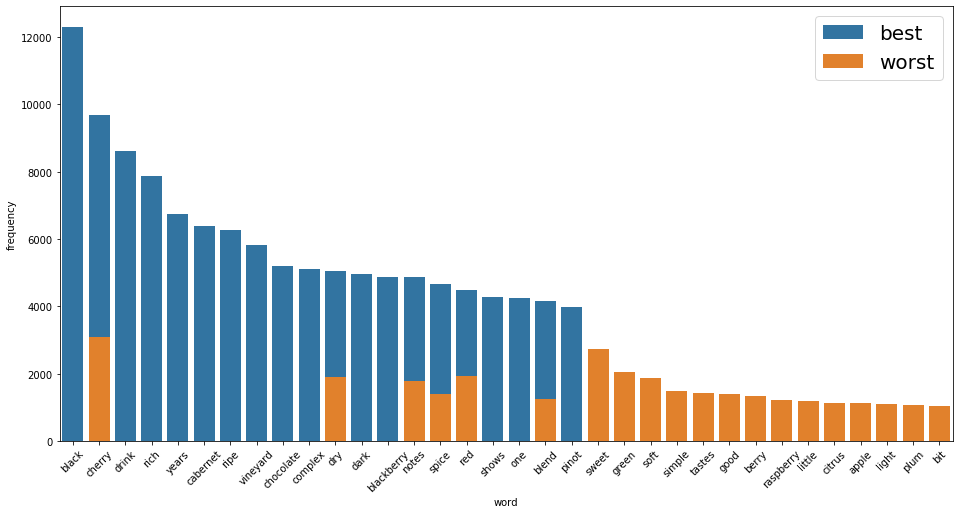

In [35]:
#data anlysis - word frequency plot

pyplot.figure(figsize=(16, 8)) #set figure size

wordPlot = sb.barplot(x="word", y="frequency", data=wordsDF, hue="type", dodge=False) #plot word and frequency, set color to word type

for item in wordPlot.get_xticklabels(): #rotate x-axis label  45 degrees
    item.set_rotation(45)

pyplot.legend(loc='upper right', fontsize='20') #move legend to top right, change font size

In [36]:
#data analysis - variety

print("There are {:d} unique varieties in this data set.".format(len(wineCombo["variety"].unique()))) #determine number of varieties

wineVar = pd.DataFrame(wineCombo.groupby(['variety'])['avgPoints'].mean().reset_index()) #group wines by average score of variety

wineVar.head()

There are 304 unique varieties in this data set.


,variety,avgPoints
0,Aglianico,88.192308
1,Albana,89.000000
2,Albariño,88.000000
3,Aleatico,89.000000
4,Alicante,87.000000


In [37]:
#data analysis - variety

bestVar = wineVar.nlargest(20, "avgPoints") #store best varieties

bestVar.head()

#wineVar.nsmallest(20, "avgPoints")

,variety,avgPoints
226,Sauvignon Gris,94.000000
233,Sherry,94.000000
179,Picolit,93.333333
21,Braucol,93.000000
192,Pinot Noir-Syrah,93.000000


[(90, 95)]

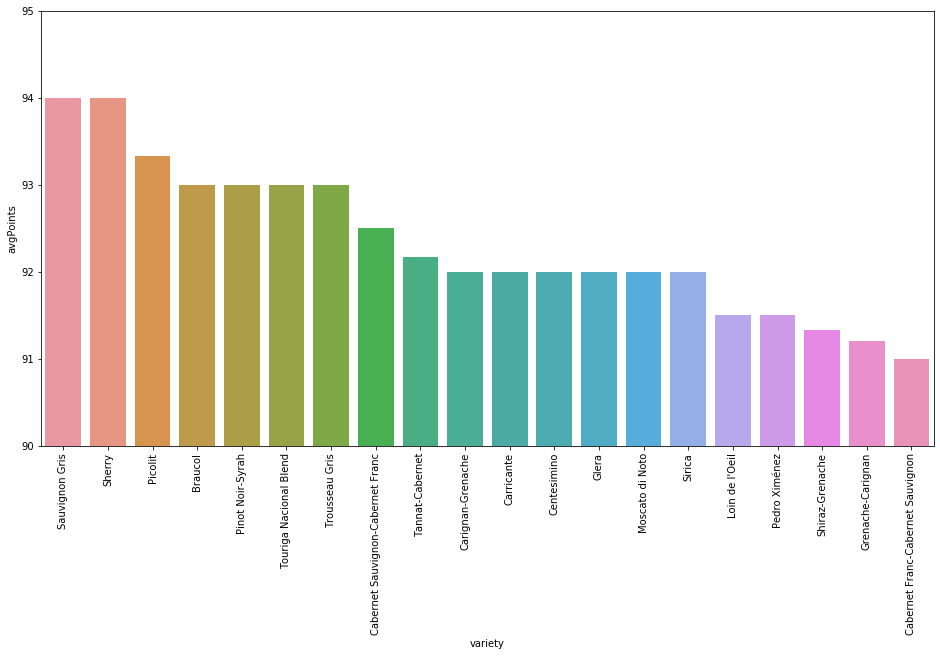

In [38]:
#data analysis - variety plot

pyplot.figure(figsize=(16, 8)) #set figure size

varPlot = sb.barplot(x="variety", y="avgPoints", data=bestVar) #plot variety by avgPoints

for item in varPlot.get_xticklabels(): #rotate x-axis label
    item.set_rotation(90)

varPlot.set(ylim=(90, 95)) #set y-scale to be 90-95


In [39]:
#data analysis - sentiment

bestDescriptionsList = list(bestDescriptions) #convert descriptions dfs to lists
worstDescriptionsList = list(worstDescriptions)

#bestDescriptionsList[0]
#worstDescriptionsList[0]

sid = SentimentIntensityAnalyzer() #save sentiment analyzer function as "sid"

for description in worstDescriptionsList[0:5]: #for the first few worst descriptions, 
    print(description) #print the description
    sents = sid.polarity_scores(description) #gather sentiment polarity scores
    for sent in sents: #for each sentiment score,
        print('{0}: {1}, '.format(sent, sents[sent], end ="")) #print scores
    print("\n") #print new line

If you are allergic to sulfites or insist on certified organic wines, this one fits the bill. Unfortunately it's heavy on the grape-juice characteristic, with sharp acids running the show. Dense and chewy, and there's an odd grapefruit note at the end.
neg: 0.15, 
neu: 0.85, 
pos: 0.0, 
compound: -0.7096, 


Heavy and waxy, with overdone varietal aromas that seem oily. Lots of pepper and cumin, but what about the fruit and acidity? Nowhere to be found.
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.0, 


Shows sugary flavors of apricots, grilled pineapples and vanilla that have a troubling vegetal edge.
neg: 0.2, 
neu: 0.8, 
pos: 0.0, 
compound: -0.5423, 


Best on the nose, but sharp and narrow as can be on the palate. Cranberry and sour cherry flavors dominate, while the finish is astringent. No amount of swirling and saving is going help it much.
neg: 0.107, 
neu: 0.749, 
pos: 0.144, 
compound: 0.3818, 


A gaseous, barnyardy wine from several vintages ago. It's tart and scratchy, wit

In [40]:
#data analysis - sentiment

for description in bestDescriptionsList[0:5]: #for the first few best descriptions, 
    print(description) #print the description
    sents = sid.polarity_scores(description) #gather sentiment polarity scores
    for sent in sents: #for each sentiment score,
        print('{0}: {1}, '.format(sent, sents[sent], end ="")) #print scores
    print("\n") #print new line

Tasted in a flight of great and famous Napa wines, this Cardinale stood at the head of the pack. Starts with a very fine nose of cedar, cassis, ripe blackberries and violets, then turns dramatic and refined in the mouth. Shows vast depth and length, with the finish a full minute of sweet fruits and spices. Marvelous tannins, so plush and elegant, so powerful yet refined. The grapes hail from Mt. Veeder, Howell Mountain, Stags Leap and Oakville, and the blend contains 14% Merlot. As good as it is now, it will improve for at least eight years.
neg: 0.0, 
neu: 0.766, 
pos: 0.234, 
compound: 0.978, 


An absolute joy and triumph. Just superb, showcasing the best of Oakville. Perfect tannins, as pure as velvet and sweet, and perfect oak, too, with beautifully applied char and wood spice. That the oak is 100% new is in keeping with the wine's volumetrics. The wine's flavors are a profound, heady expression of blackberries, blueberries, cassis and dark, barely sweetened chocolate. Just specta

In [46]:
#sentiment of worst descriptions

wneg = [] #initialize empty lists
wneu = []
wpos = []
wcomp = []

for description in worstDescriptionsList: #for each description in the worst list,
    sent = sid.polarity_scores(description) #get polarity score
    wneg.append(sent["neg"]) #append negative, neutral, positive, and compound score to respective list
    wneu.append(sent["neu"])
    wpos.append(sent["pos"])
    wcomp.append(sent["compound"])
    
print("On average, the 1,000 worst descriptions were {:g}% negative: ".format((sum(wneg)/len(worstDescriptionsList))*100)) #print average score for all worst descriptions
print("On average, the 1,000 worst descriptions were {:g}% neutral: ".format((sum(wneu)/len(worstDescriptionsList))*100))
print("On average, the 1,000 worst descriptions were {:g}% positive: ".format((sum(wpos)/len(worstDescriptionsList))*100))
print("Overall, the 1,000 worst descriptions had an average compound sentiment of {:g}.".format((sum(wcomp)/len(worstDescriptionsList))))


On average, the 1,000 worst descriptions were 4.2085% negative: 
On average, the 1,000 worst descriptions were 86.4729% neutral: 
On average, the 1,000 worst descriptions were 9.3201% positive: 
Overall, the 1,000 worst descriptions had an average compound sentiment of 0.191388.


In [45]:
#sentiment of best descriptions

bneg = [] #repeat sentiment analysis for best wine descriptions
bneu = []
bpos = []
bcomp = []

for description in bestDescriptionsList:
    sent = sid.polarity_scores(description)
    bneg.append(sent["neg"])
    bneu.append(sent["neu"])
    bpos.append(sent["pos"])
    bcomp.append(sent["compound"])
    
print("On average, the 1,000 best descriptions were {:g}% negative: ".format((sum(bneg)/len(bestDescriptionsList))*100))
print("On average, the 1,000 best descriptions were {:g}% neutral: ".format((sum(bneu)/len(bestDescriptionsList))*100))
print("On average, the 1,000 best descriptions were {:g}% positive: ".format((sum(bpos)/len(bestDescriptionsList))*100))
print("Overall, the 1,000 best descriptions had an average compound sentiment of {:g}.".format((sum(bcomp)/len(bestDescriptionsList))))


On average, the 1,000 best descriptions were 1.2325% negative: 
On average, the 1,000 best descriptions were 83.019% neutral: 
On average, the 1,000 best descriptions were 15.7493% positive: 
Overall, the 1,000 best descriptions had an average compound sentiment of 0.717997.


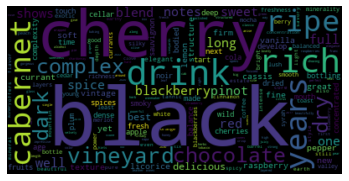

In [43]:
#dara analysis - wordclouds

bestCloud = WordCloud().generate_from_frequencies(bestWordsFreq) #create word cloud with words from best wines

pyplot.figure() #plot word cloud
pyplot.imshow(bestCloud, interpolation="bilinear")
pyplot.axis("off")
pyplot.show()

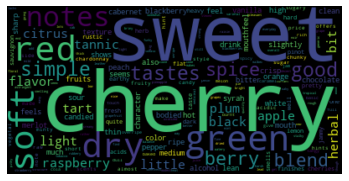

In [44]:
#data analysis - word cloud 

worstCloud = WordCloud().generate_from_frequencies(worstWordsFreq) #create word cloud with words from worst wines 

pyplot.figure() #plot word clound
pyplot.imshow(worstCloud, interpolation="bilinear")
pyplot.axis("off")
pyplot.show()